In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv('marketing_campaign.csv', delimiter= '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.drop(['ID'],axis=1,inplace=True)

In [5]:
for i in df.columns:
    print(i,df[i].isna().sum())

Year_Birth 0
Education 0
Marital_Status 0
Income 24
Kidhome 0
Teenhome 0
Dt_Customer 0
Recency 0
MntWines 0
MntFruits 0
MntMeatProducts 0
MntFishProducts 0
MntSweetProducts 0
MntGoldProds 0
NumDealsPurchases 0
NumWebPurchases 0
NumCatalogPurchases 0
NumStorePurchases 0
NumWebVisitsMonth 0
AcceptedCmp3 0
AcceptedCmp4 0
AcceptedCmp5 0
AcceptedCmp1 0
AcceptedCmp2 0
Complain 0
Z_CostContact 0
Z_Revenue 0
Response 0


In [6]:
df['Income'].median()

51381.5

In [7]:
df['Income'].mean()

52247.25135379061

In [8]:
df['Income'] = np.where(df['Income'].isna(),df['Income'].median(),df['Income'])

In [9]:
df['Income'].mean()

52237.97544642857

In [10]:
cat_cols = []

num_cols = []

In [11]:
for i in df.columns:
    if df[i].dtype == 'O':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [12]:
num_cols

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [13]:
cat_cols

['Education', 'Marital_Status', 'Dt_Customer']

(array([1.26184097e-02, 6.24940197e-03, 3.43866616e-03, 1.97349536e-03,
        1.82398814e-03, 1.40536791e-03, 1.19605779e-03, 8.37240455e-04,
        8.67141900e-04, 8.37240455e-04, 1.37546646e-03, 1.22595924e-03,
        9.86747680e-04, 1.13625490e-03, 6.87733231e-04, 9.86747680e-04,
        8.37240455e-04, 8.37240455e-04, 7.47536121e-04, 8.97043345e-04,
        5.38226007e-04, 7.17634676e-04, 5.38226007e-04, 8.67141900e-04,
        6.57831786e-04, 1.04655057e-03, 7.77437566e-04, 7.77437566e-04,
        4.48521673e-04, 5.68127452e-04, 8.07339011e-04, 3.88718783e-04,
        6.87733231e-04, 6.27930342e-04, 8.67141900e-04, 7.17634676e-04,
        4.48521673e-04, 7.17634676e-04, 4.48521673e-04, 5.68127452e-04,
        4.48521673e-04, 6.27930342e-04, 4.78423117e-04, 4.18620228e-04,
        2.09310114e-04, 3.58817338e-04, 2.39211559e-04, 6.57831786e-04,
        2.99014448e-04, 5.08324562e-04, 5.68127452e-04, 2.09310114e-04,
        4.18620228e-04, 3.28915893e-04, 2.99014448e-04, 3.887187

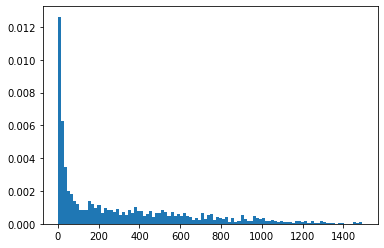

In [14]:
plt.hist(df['MntWines'],bins=100, density=0.6)

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


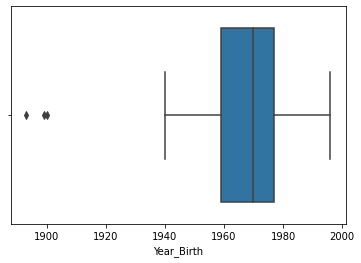

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


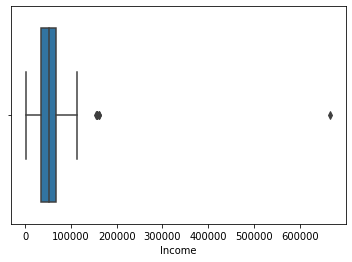

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


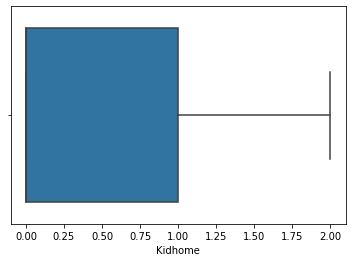

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


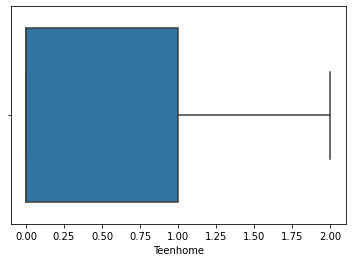

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


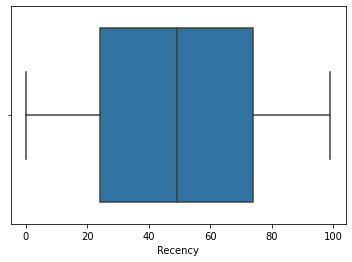

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


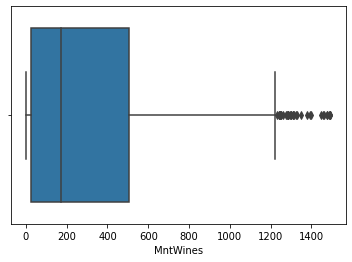

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


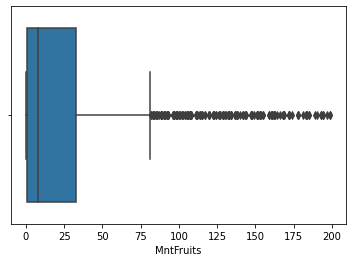

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


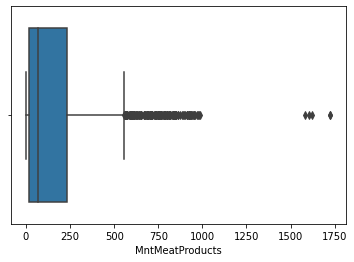

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


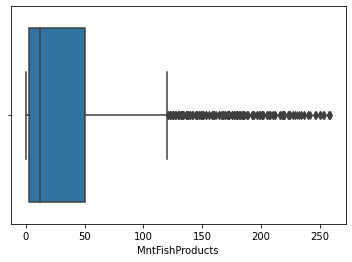

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


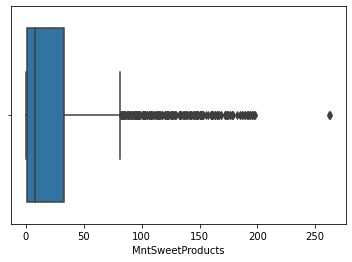

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


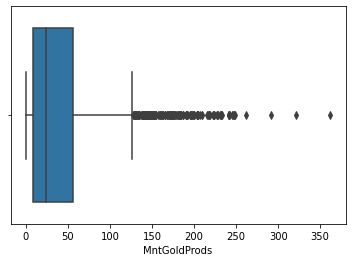

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


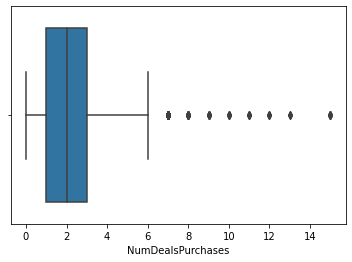

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


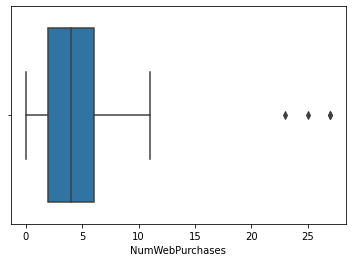

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


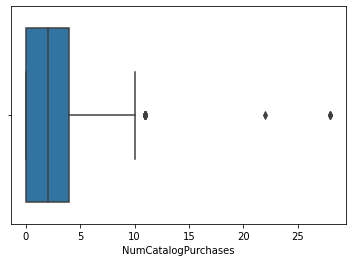

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


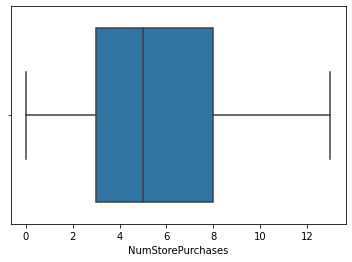

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


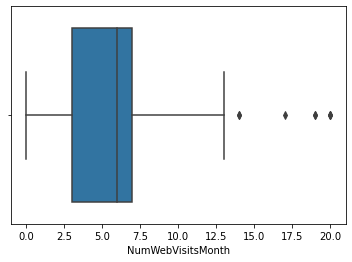

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


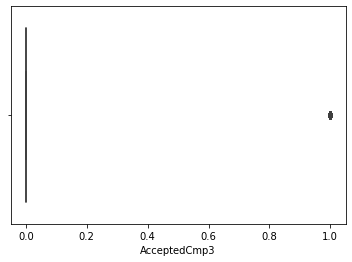

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


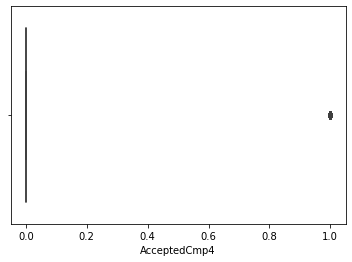

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


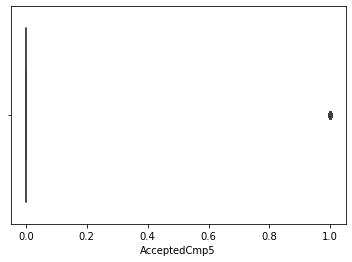

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


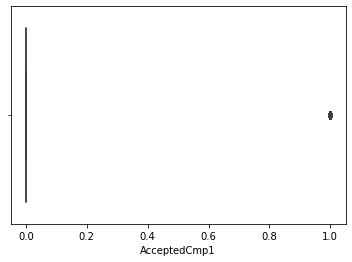

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


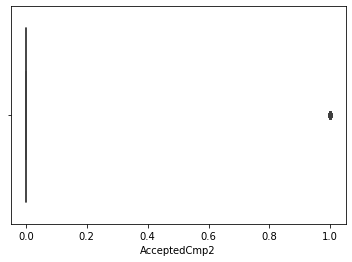

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


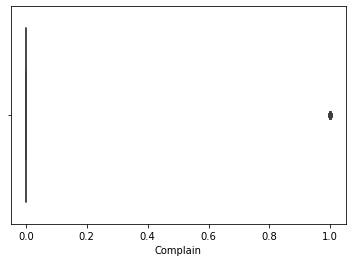

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


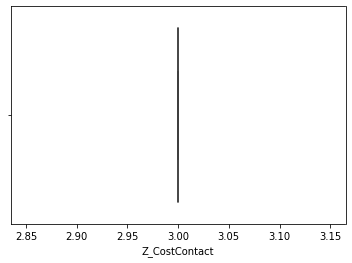

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


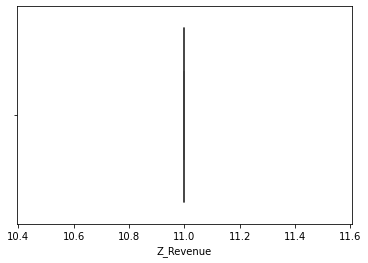

/home/aditya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


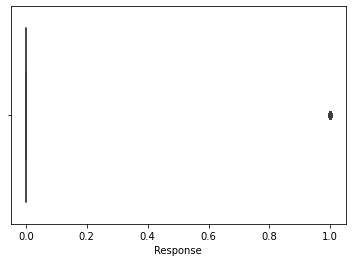

In [15]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

In [16]:
df[df['MntWines']>1200]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
111,1991,PhD,Single,68126.0,0,0,10-11-2012,40,1332,17,...,9,0,1,0,0,0,0,3,11,1
161,1945,PhD,Married,70356.0,0,0,05-11-2012,20,1349,16,...,6,0,0,0,0,0,0,3,11,0
246,1972,Graduation,Married,80134.0,1,0,20-05-2013,40,1218,16,...,6,0,1,1,1,0,0,3,11,1
295,1952,Master,Together,55951.0,0,1,23-08-2012,62,1241,0,...,8,0,1,0,0,1,0,3,11,0
424,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,...,2,0,0,1,0,0,0,3,11,0
430,1961,PhD,Single,84865.0,0,0,09-05-2013,1,1248,16,...,4,0,1,1,1,1,0,3,11,1
466,1955,PhD,Together,75261.0,0,0,23-04-2013,17,1239,17,...,2,0,1,1,0,0,0,3,11,1
497,1971,PhD,Together,78642.0,0,1,21-04-2013,83,1396,0,...,6,0,0,0,0,0,0,3,11,0
515,1975,Master,Single,81169.0,0,0,14-04-2013,47,1288,20,...,2,0,0,0,0,0,0,3,11,0
523,1953,Graduation,Married,70503.0,0,0,30-09-2012,73,1379,33,...,6,0,1,1,0,0,0,3,11,0


In [30]:
for i in num_cols:
    print(i,df[i].mean() - 3*df[i].std(),df[i].mean() + 3*df[i].std())

Year_Birth 1932.8535952007712 2004.7580119420861
Income -22875.89222543712 127351.84311829426
Kidhome -1.170997864632352 2.059390721775209
Teenhome -1.1273646923096274 2.1398646923096276
Recency -37.77798342513462 135.9967334251346
MntWines -705.856463530401 1313.7278921018296
MntFruits -93.01806915087849 145.6225334365928
MntMeatProducts -510.19611753526084 844.0961175352609
MntFishProducts -126.36149178006278 201.41238463720563
MntSweetProducts -96.77854903499338 150.90444189213622
MntGoldProds -112.48044174499199 200.52419174499198
NumDealsPurchases -3.4717125025679367 8.121712502567938
NumWebPurchases -4.251321013592877 12.420963870735735
NumCatalogPurchases -6.107248395190667 11.43135553804781
NumStorePurchases -3.9626958655947266 15.543053008451869
NumWebVisitsMonth -1.9634171714989996 12.596452885784714
AcceptedCmp3 -0.7066713526228281 0.8522070669085424
AcceptedCmp4 -0.7136312831321125 0.8627384259892554
AcceptedCmp5 -0.7066713526228281 0.8522070669085424
AcceptedCmp1 -0.671662

In [40]:
df = df[df['Income']<666666]

In [41]:
for i in num_cols:
    print(i,df[df[i]>(df[i].mean()+(3*df[i].std()))].shape,df[i].mean(), df[i].max())

Year_Birth (0, 28) 1968.8021438142027 1996
Income (7, 28) 51963.55471192497 162397.0
Kidhome (0, 28) 0.4439481911567664 2
Teenhome (0, 28) 0.5064761054041983 2
Recency (0, 28) 49.12103617686467 99
MntWines (16, 28) 304.06744082179546 1493
MntFruits (64, 28) 26.30772666368915 199
MntMeatProducts (37, 28) 167.01652523447967 1725
MntFishProducts (58, 28) 37.53863331844573 259
MntSweetProducts (62, 28) 27.07458686913801 263
MntGoldProds (44, 28) 44.03617686467173 362
NumDealsPurchases (32, 28) 2.3242518981688254 15
NumWebPurchases (4, 28) 4.085305940151853 27
NumCatalogPurchases (4, 28) 2.662795891022778 28
NumStorePurchases (0, 28) 5.791424743188924 13
NumWebVisitsMonth (9, 28) 5.316212594908441 20
AcceptedCmp3 (163, 28) 0.07280035730236713 1
AcceptedCmp4 (167, 28) 0.07458686913800804 1
AcceptedCmp5 (163, 28) 0.07280035730236713 1
AcceptedCmp1 (144, 28) 0.0643144260830728 1
AcceptedCmp2 (30, 28) 0.013398838767306834 1
Complain (21, 28) 0.009379187137114784 1
Z_CostContact (0, 28) 3.0 3
Z_

In [39]:
df[df['Income']>(df['Income'].mean()+3*df['Income'].std())]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,0,0,0,0,0,0,0,3,11,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,...,1,0,0,0,0,0,0,3,11,0
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,0,0,0,3,11,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,0,0,0,0,0,0,0,3,11,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,...,1,0,0,0,0,0,0,3,11,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,...,1,0,0,0,0,0,0,3,11,0
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,0,0,0,3,11,0
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,6,0,0,0,0,0,0,3,11,0


In [43]:
outlier_col = ['Income','MntWines','MntMeatProducts','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds']

In [44]:
for i in outlier_col:
    tstd = df[i].mean()+(3*df[i].std())
    df = df[df[i]<tstd]

In [45]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,...,7,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [47]:
df['curr_date']= dt.date.today()
df['Dt_Customer'] =df['Dt_Customer'].apply(pd.to_datetime)
df['curr_date'] = df['curr_date'].apply(pd.to_datetime)
df['days'] = (df['curr_date']-df['Dt_Customer']).dt.days
df.drop(['curr_date','Dt_Customer'],axis =1,inplace=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,days
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,3,11,1,3463
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,2617
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,3,11,0,2964
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,3,11,0,2557
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,3,11,0,2813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1974,Graduation,Married,34421.0,1,0,81,3,3,7,...,0,0,0,0,0,0,3,11,0,3190
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,0,0,0,1,0,0,3,11,0,2553
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,0,1,0,0,0,0,3,11,0,2807
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,0,3,11,0,2808


In [51]:
df['Age'] = 2021-df['Year_Birth']
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,days,Age
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,3463,64
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,2617,67
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,2964,56
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,2557,37
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,2813,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1974,Graduation,Married,34421.0,1,0,81,3,3,7,...,0,0,0,0,0,3,11,0,3190,47
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,0,0,1,0,0,3,11,0,2553,75
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,0,0,0,0,3,11,0,2807,40
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,3,11,0,2808,65


In [52]:
df.drop(['Year_Birth'],axis = 1, inplace=True)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,days,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,3463,64
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,2617,67
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,2964,56
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,2557,37
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,2813,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,Graduation,Married,34421.0,1,0,81,3,3,7,6,...,0,0,0,0,0,3,11,0,3190,47
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,1,0,0,3,11,0,2553,75
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,1,0,0,0,0,3,11,0,2807,40
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,3,11,0,2808,65


In [55]:
df.to_csv('cleaned_data.csv',index=False)